In [72]:
import pandas as pd
from pathlib import Path
import eyed3
import os
from config import *
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

eyed3.log.setLevel("ERROR")

In [73]:
def get_genre_list(root_dir):
    '''Given a directory, loop through genre folders and return list of genres'''
    genre_list = [f.name for f in os.scandir(root_dir) if f.is_dir()]
    return genre_list

In [74]:
# Get Genres
root_dir = a_path
genre_list = get_genre_list(root_dir)
print(genre_list)

['Hip-Hop', 'Trip-Hop', 'Ambient Electronic', 'Pop', 'Metal', 'Reggae', 'Electronic', 'Classical', 'Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']


In [75]:
print(root_dir)

/Volumes/APE_External/Dropbox/_Classes/21_Winter/CS_467/Project_Folder/fma/data/export/audio_samples


In [76]:
# Extracting features from Spectogram
# We will extract:
#   Mel-frequency cepstral coefficients (MFCC)(20 in number)
#   Spectral Centroid
#   Zero Crossing Rate
#   Chroma Frequencies
#   Spectral Roll-off

header = 'filename chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' genre'
header = header.split()
print(header)

['filename', 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'genre']


In [21]:
# Writing all data to a .csv file
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
#genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genre_list:
    for filename in os.listdir(root_dir + f'/{g}'):
        if filename[-4:] != ".mp3": 
            continue
        songname = root_dir + f'/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

NoBackendError: 

In [32]:
# Trip-Hop write csv
# Header
g = 'Trip-Hop'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    if filename[-4:] != ".mp3": 
        continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

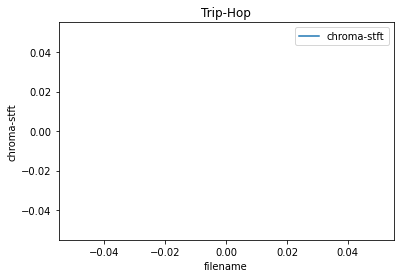

In [96]:
# Trip-Hop Graphs
genre = 'Trip-Hop'
filenames_x = []
chroma_y = []

trip_hop_df = pd.read_csv(f'{genre}.csv')
chroma_y = trip_hop_df['chroma_stft']
filenames_x = trip_hop_df['filename']

# with open(f'{genre}.csv', 'r') as csvfile:
#     plots = csv.reader(csvfile, delimiter=',')
#     for col in plots:
#         x.append(col[0])
#         y.append(col[1])

plt.plot(filenames_x, chroma_y, label='chroma-stft')
plt.xlabel('filename')
plt.ylabel('chroma-stft')
plt.title(f'{genre}')
plt.legend()
plt.show()

In [93]:
# Hip-Hop write csv
# Header
g = 'Hip-Hop'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    # if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #     continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

NoBackendError: 

In [83]:
# ['Ambient Electronic', 'Pop', 'Metal', 'Reggae', 'Electronic', 'Classical', 'Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Ambient Electronic write csv
# Header
g = 'Ambient Electronic'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [87]:
# ['Pop', 'Metal', 'Reggae', 'Electronic', 'Classical', 'Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Pop write csv
# Header
g = 'Pop'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [78]:
# ['Metal', 'Reggae', 'Electronic', 'Classical', 'Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Metal write csv
# Header
g = 'Metal'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [79]:
# ['Reggae', 'Electronic', 'Classical', 'Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Reggae write csv
# Header
g = 'Reggae'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [ ]:
# ['Electronic', 'Classical', 'Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Electronic write csv
# Header
g = 'Electronic'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
        continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [84]:
# ['Classical', 'Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Classical write csv
# Header
g = 'Classical'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [85]:
# ['Indie-Rock', 'Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Indie-Rock write csv
# Header
g = 'Indie-Rock'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [ ]:
# ['Rock', 'Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Rock write csv
# Header
g = 'Rock'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
        continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [82]:
# ['Chiptune', 'Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Chiptune write csv
# Header
g = 'Chiptune'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [80]:
# ['Folk', 'Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Folk write csv
# Header
g = 'Folk'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [ ]:
# ['Punk', 'Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Punk write csv
# Header
g = 'Punk'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
        continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [88]:
# ['Post-Rock', 'Country', 'Techno', 'Jazz', 'Psych-Rock']
# Post-Rock write csv
# Header
g = 'Post-Rock'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [81]:
# ['Country', 'Techno', 'Jazz', 'Psych-Rock']
# Country write csv
# Header
g = 'Country'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [90]:
# ['Techno', 'Jazz', 'Psych-Rock']
# Techno write csv
# Header
g = 'Techno'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [86]:
# ['Jazz', 'Psych-Rock']
# Jazz write csv
# Header
g = 'Jazz'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [89]:
# ['Psych-Rock']
# Psych-Rock write csv
# Header
g = 'Psych-Rock'
file = open(f'{g}.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

# .csv file
for filename in os.listdir(root_dir + f'/{g}'):
    #if (filename[-4:] != ".mp3") or (os.stat(filename).st_size < 5000): 
    #    continue
    songname = root_dir + f'/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open(f'{g}.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())